![title](static/wcar.png)
#  Analysis of ss-oligo mediated editing

    Wellcome Centre for Anti-Infectives Research
    School of Life Sciences, University of Dundee

In [92]:
gencode = {
    'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
    'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
    'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
    'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',
    'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
    'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
    'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
    'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
    'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
    'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
    'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
    'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
    'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
    'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
    'TAC':'Y', 'TAT':'Y', 'TAA':'*', 'TAG':'*',
    'TGC':'C', 'TGT':'C', 'TGA':'*', 'TGG':'W'}


In [93]:
#set up labels with codon and amino-acid
labels = {}
for n in gencode:
    labels[n] = n+' ({})'.format(gencode[n])
#labels    

In [94]:
from Bio import SeqIO
from Bio.Seq import Seq
import gzip
import re
from tqdm import tqdm_notebook
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [95]:
#load dataset
df = pd.read_csv('all_df.csv',index_col=[0])
#remove reads count that did not pass the following conditions:
#1) degenerate triplets covered by both mate reads 
#2) same codon in both mate mate reads
temp=df.drop('failed')
temp = temp/temp.sum()

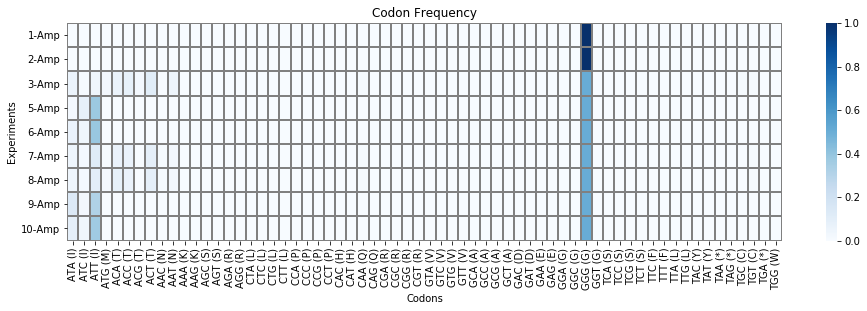

In [97]:
#visualize all
fig,ax=plt.subplots(figsize=(16,4))
sns.heatmap(temp.T.round(2).rename(labels,axis=1),ax=ax,cmap='Blues',linewidths=1, linecolor='grey')
ymin, ymax = ax.get_ylim()
ax.set_ylim(ymin+0.5,ymax-0.5)
ax.set_xlabel('Codons')
ax.set_ylabel('Experiments')
plt.title('Codon Frequency')
plt.show()

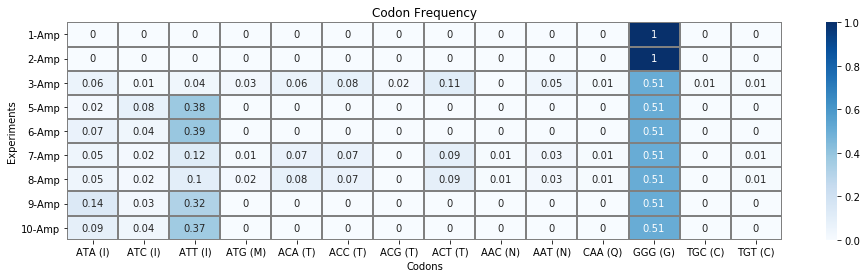

In [98]:
#visualize selection
fig,ax=plt.subplots(figsize=(16,4))
selection = temp.T.round(2)
#selection = selection[(selection != 0).any()]
selection = selection.loc[:, (selection != 0).any(axis=0)]
sns.heatmap(selection.rename(labels,axis=1) ,ax=ax,cmap='Blues',linewidths=1, linecolor='grey',annot=True)
ymin, ymax = ax.get_ylim()
ax.set_ylim(ymin+0.5,ymax-0.5)
ax.set_xlabel('Codons')
ax.set_ylabel('Experiments')
plt.title('Codon Frequency')
plt.show()

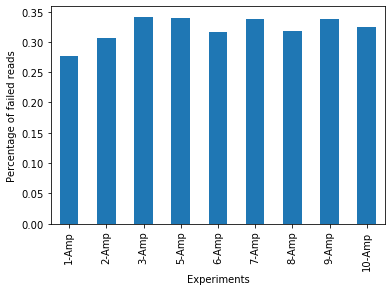

In [100]:
#% of paired reads that failed the conditions of:
#1) degenerate triplets covered by both mate reads 
#2) same codon in both mate mate reads
temp = df/df.sum()
temp.T['failed'].plot(kind='bar')
plt.ylabel('Percentage of failed reads')
plt.xlabel('Experiments')
#plt.title('Codon Frequency')
plt.show()

Text(0.5, 0, 'Experiments')

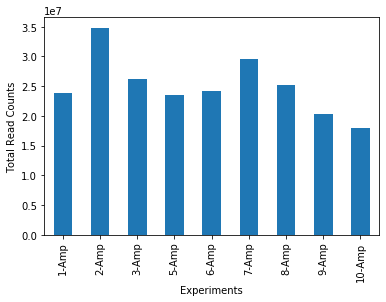

In [101]:
#count of reads in each sample
df.sum().plot(kind='bar')
plt.ylabel('Total Read Counts')
plt.xlabel('Experiments')

In [102]:
temp=df.drop('failed')
temp = temp/temp.sum()
temp.head()

,1-Amp,2-Amp,3-Amp,5-Amp,6-Amp,7-Amp,8-Amp,9-Amp,10-Amp
ATA,0.000111,0.000078,0.062145,0.022807,0.065720,0.049650,0.049807,0.143212,0.085736
ATC,0.000051,0.000037,0.013926,0.077885,0.036212,0.022025,0.023127,0.028307,0.035062
ATT,0.000404,0.000280,0.039980,0.383764,0.386575,0.118881,0.102165,0.316841,0.367431
ATG,0.000019,0.000016,0.025256,0.000066,0.000049,0.012158,0.015484,0.000615,0.003946
ACA,0.000066,0.000052,0.056278,0.000123,0.000071,0.074517,0.081089,0.000133,0.000193


In [103]:
temp = temp.T
temp.head()

,ATA,ATC,ATT,ATG,ACA,ACC,ACG,ACT,AAC,AAT,...,TTA,TTG,TAC,TAT,TAA,TAG,TGC,TGT,TGA,TGG
1-Amp,0.000111,0.000051,0.000404,0.000019,0.000066,0.000049,0.000010,0.000087,0.000003,0.000032,...,0.000000,0.000000e+00,0.000000e+00,5.814894e-08,0.000000e+00,0.000000e+00,0.000004,0.000008,0.000000e+00,0.000009
2-Amp,0.000078,0.000037,0.000280,0.000016,0.000052,0.000040,0.000008,0.000067,0.000002,0.000022,...,0.000000,0.000000e+00,0.000000e+00,1.655583e-07,0.000000e+00,0.000000e+00,0.000002,0.000007,0.000000e+00,0.000008
3-Amp,0.062145,0.013926,0.039980,0.025256,0.056278,0.084356,0.017065,0.107113,0.001501,0.053581,...,0.000001,8.134984e-07,7.553914e-07,1.568890e-06,1.336462e-06,4.648562e-07,0.007557,0.006774,9.297125e-07,0.000013
5-Amp,0.022807,0.077885,0.383764,0.000066,0.000123,0.000149,0.000018,0.000330,0.000007,0.000063,...,0.000001,7.083065e-07,3.863490e-07,1.030264e-06,3.219575e-07,1.931745e-07,0.000004,0.000014,3.219575e-07,0.000004
6-Amp,0.065720,0.036212,0.386575,0.000049,0.000071,0.000059,0.000007,0.000199,0.000003,0.000034,...,0.000004,2.049533e-06,9.042057e-07,3.435982e-06,1.145327e-06,8.439253e-07,0.000003,0.000009,6.630842e-07,0.000005


In [104]:
temp['experiment']=['mock', 'mock', 
                '5nM_1zapp',
                '20nM_1zapp', '20nM_1zapp',
                '5nM_4zapp', '5nM_4zapp',
                '20nM_4zapp','20nM_4zapp']

In [105]:
temp = temp.groupby('experiment').mean() 

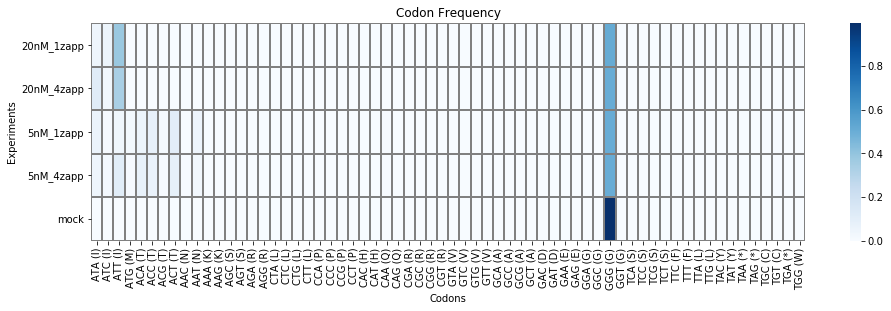

In [106]:
#average results and plot 
fig,ax=plt.subplots(figsize=(16,4))
sns.heatmap(temp.rename(labels,axis=1),ax=ax,cmap='Blues',linewidths=1, linecolor='grey')
ymin, ymax = ax.get_ylim()
ax.set_ylim(ymin+0.5,ymax-0.5)
ax.set_xlabel('Codons')
ax.set_ylabel('Experiments')
plt.title('Codon Frequency')
plt.show()

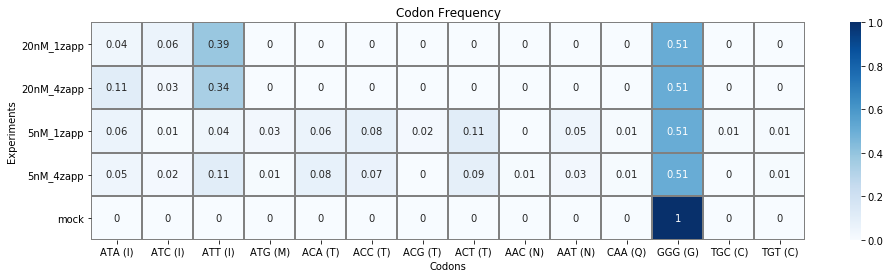

In [107]:
#average results and plot selection
fig,ax=plt.subplots(figsize=(16,4))
selection = temp.round(2)
#selection = selection[(selection != 0).any()]
selection = selection.loc[:, (selection != 0).any(axis=0)]
sns.heatmap(selection.rename(labels,axis=1) ,ax=ax,cmap='Blues',linewidths=1, linecolor='grey',annot=True)
ymin, ymax = ax.get_ylim()
ax.set_ylim(ymin+0.5,ymax-0.5)
ax.set_xlabel('Codons')
ax.set_ylabel('Experiments')
plt.title('Codon Frequency')
plt.show()

In [108]:
!jupyter nbconvert --to html_toc make_plots.ipynb

[NbConvertApp] Converting notebook make_plots.ipynb to html_toc
[NbConvertApp] Support files will be in make_plots_files/
[NbConvertApp] Making directory make_plots_files
[NbConvertApp] Making directory make_plots_files
[NbConvertApp] Making directory make_plots_files
[NbConvertApp] Making directory make_plots_files
[NbConvertApp] Making directory make_plots_files
[NbConvertApp] Making directory make_plots_files
[NbConvertApp] Writing 312126 bytes to make_plots.html
